<a href="https://colab.research.google.com/github/katielavigna/produce_pal/blob/main/Produce_Pal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [24]:
import os

In [5]:
import numpy as np
import tensorflow as tf
print("Numpy version: ", np.__version__, "\nTensorflow version: ", tf.__version__)

Numpy version:  1.19.2 
Tensorflow version:  2.4.0


In [9]:
import tensorflow as tf

In [10]:
from tensorflow import keras

In [110]:
from tensorflow.keras import backend, models, layers, optimizers
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.applications import imagenet_utils
from tensorflow.keras.layers import Dense,GlobalAveragePooling2D
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.applications.mobilenet import preprocess_input
from tensorflow.keras.callbacks import EarlyStopping

In [128]:
# Specify the base directory where images are located.
base_dir = '/content/drive/MyDrive/msds_cv/'

In [129]:

# Specify the traning, validation, and test dirrectories.  
train_dir = os.path.join(base_dir, 'train_data')
test_dir = os.path.join(base_dir, 'test_data')
all_dir = os.path.join(base_dir, 'fruit_and_veg_data')

In [93]:
image_gen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

In [96]:
train_generator = image_gen.flow_from_directory(
    all_dir,
    target_size=(224,224),
    batch_size=32,
    classes=class_labels,
    class_mode='categorical',
    shuffle=True,
    subset='training')

Found 1965 images belonging to 45 classes.


In [97]:

test_generator = image_gen.flow_from_directory(
    all_dir,
    target_size=(224,224),
    batch_size=32,
    classes=class_labels,
    class_mode='categorical',
    shuffle=True,
    subset='validation')

Found 467 images belonging to 45 classes.


### Mobile Net

In [113]:
backend.clear_session()
base_model=keras.applications.mobilenet.MobileNet(weights='imagenet',
                                                  input_shape=(224, 224, 3,),
                                                  include_top=False) #imports the mobilenet model and discards the last 1000 neuron layer.

In [114]:
x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(512, activation = 'relu')(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
output=Dense(45,activation='softmax')(x) #final layer with softmax activation

In [115]:
model=Model(inputs=base_model.inputs, outputs=output)

In [130]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32)      0     

In [116]:
# Compile the model with categorical crossentropy for the loss function and SGD for the optimizer with the learning
# rate at 1e-4 and momentum at 0.9
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.SGD(learning_rate=0.0001, momentum=0.9),
              # optimizer="adam",
              metrics=['accuracy'])

In [117]:
history2 = model.fit_generator(
    train_generator,
    epochs=25,
    validation_data=test_generator,
    verbose = 1,
    callbacks=[EarlyStopping(monitor='val_accuracy', patience = 5, restore_best_weights = True)])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/25
33/62 [==============>...............] - ETA: 15s - loss: 4.3854 - accuracy: 0.0121

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


54/62 [=========================>....] - ETA: 4s - loss: 4.2935 - accuracy: 0.0202

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


62/62 [==============================] - 42s 654ms/step - loss: 4.2589 - accuracy: 0.0241 - val_loss: 3.6151 - val_accuracy: 0.1349
Epoch 2/25
62/62 [==============================] - 40s 641ms/step - loss: 3.3351 - accuracy: 0.1940 - val_loss: 3.1644 - val_accuracy: 0.2270
Epoch 3/25
62/62 [==============================] - 40s 643ms/step - loss: 2.9836 - accuracy: 0.2529 - val_loss: 2.8761 - val_accuracy: 0.2527
Epoch 4/25
62/62 [==============================] - 40s 643ms/step - loss: 2.6890 - accuracy: 0.3196 - val_loss: 2.6527 - val_accuracy: 0.3084
Epoch 5/25
62/62 [==============================] - 40s 640ms/step - loss: 2.4817 - accuracy: 0.3687 - val_loss: 2.4695 - val_accuracy: 0.3640
Epoch 6/25
62/62 [==============================] - 40s 645ms/step - loss: 2.2536 - accuracy: 0.4228 - val_loss: 2.3112 - val_accuracy: 0.4325
Epoch 7/25
62/62 [==============================] - 40s 640ms/step - loss: 2.1046 - accuracy: 0.4858 - val_loss: 2.1704 - val_accuracy: 0.4732
Epoch 8/25

In [118]:
model.save(base_dir + 'mobilenet_m3.h5')

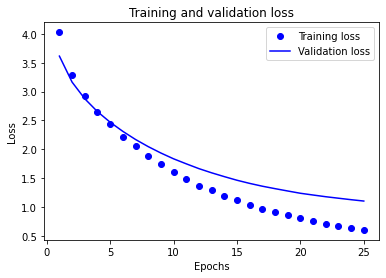

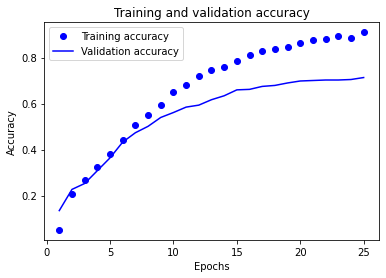

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


Model testing accuracy/testing loss: 0.7130621075630188   1.102927565574646


In [126]:
# Create a dictionary of the model history 
import matplotlib.pyplot as plt
history_dict = history2.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(history_dict['accuracy']) + 1)

# Plot the training/validation loss
plt.plot(epochs, loss_values, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the training/validation accuracy
plt.plot(epochs, acc_values, 'bo', label = 'Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label = 'Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


# Evaluate the test accuracy and test loss of the model
test_loss, test_acc = model.evaluate_generator(test_generator)

print('Model testing accuracy/testing loss:', test_acc, " ", test_loss)


In [66]:
class_labels = ['banana',
 'carrot',
 'ginger',
 'orange',
 'pineapple',
 'soy beans',
 'garlic',
 'artichoke',
 'peach',
 'tomato',
 'beetroot',
 'grapes',
 'corn',
 'cabbage',
 'broccoli',
 'eggplant',
 'mango',
 'rutabaga',
 'watermelon',
 'blueberries',
 'jalepeno',
 'paprika',
 'cauliflower',
 'cucumber',
 'shishito pepper',
 'donut peach',
 'potato',
 'sweetcorn',
 'plum',
 'onion',
 'peas',
 'pomegranate',
 'spinach',
 'kiwi',
 'lemon',
 'sweetpotato',
 'bell pepper',
 'capsicum',
 'lettuce',
 'pear',
 'apple',
 'turnip',
 'raddish',
 'chilli pepper',
 'pummelo']

In [48]:
from tensorflow.keras.models import load_model
import coremltools

In [119]:
model = load_model(base_dir + 'mobilenet_m3.h5')

In [120]:
# make sure entries of class_labels are strings
for i, label in enumerate(class_labels):
  if isinstance(label, bytes):
    class_labels[i] = label.decode("utf8")

In [121]:
image_input = coremltools.ImageType(shape=(1, 224, 224, 3,),
                                    bias=[-1,-1,-1],
                                    scale=1./255)

In [122]:
classifier_config = coremltools.ClassifierConfig(class_labels)

In [123]:
coreml_model = coremltools.convert(model,
                                   inputs=[image_input],
                                   classifier_config=classifier_config,
                                   input_names='image',
                                   output_names='output',
                                   image_input_names='image'
                                   )

Translating MIL ==> MLModel Ops: 100%|██████████| 408/408 [00:00<00:00, 873.37 ops/s] 


In [124]:
# Set feature descriptions (these show up as comments in XCode)
coreml_model.input_description["input_1"] = "Input image to be classified"
coreml_model.output_description["classLabel"] = "Most likely image category"

# Set model author name
coreml_model.author = 'Kathryn LaVigna'

# Set the license of the model
coreml_model.license = "Please see https://github.com/tensorflow/tensorflow for license information, and https://github.com/tensorflow/models/tree/master/research/slim/nets/mobilenet for the original source of the model."

# Set a short description for the Xcode UI
coreml_model.short_description = "Detects the dominant objects present in an image from a set of 45 categories of fruits and vegetables."

# Set a version for the model
coreml_model.version = "2.0"

In [125]:
coreml_model.save(base_dir + 'producepal_mobilenet_m3.mlmodel')